#Przygotowanie danych

Imports


In [97]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay , classification_report ,f1_score, accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import recall_score

from sklearn.decomposition import PCA

Wczytanie danych


In [98]:
data_bankructwo = pd.read_csv('data_bankructwo.csv')

data_bankructwo

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Current Liability to Liability,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,Net Income to Total Assets,Total assets to GNP price,Gross Profit to Sales
0,1,0.370594,0.405750,0.601457,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,...,6.550000e+09,0.593831,4.580000e+08,0.676269,0.126549,0.637555,0.458609,0.716845,0.009219,0.601453
1,1,0.464291,0.516730,0.610235,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,...,7.700000e+09,0.593916,2.490000e+09,0.308589,0.120916,0.641100,0.459001,0.795297,0.008323,0.610237
2,1,0.426071,0.472295,0.601450,0.601364,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,...,1.022676e-03,0.594502,7.610000e+08,0.446027,0.117922,0.642765,0.459254,0.774670,0.040003,0.601449
3,1,0.399844,0.457733,0.583541,0.583541,0.998700,0.303350,1.078888e-04,0.000000e+00,0.465705,...,6.050000e+09,0.593889,2.030000e+09,0.615848,0.120760,0.579039,0.448518,0.739555,0.003252,0.583538
4,1,0.465022,0.522298,0.598783,0.598783,0.998973,0.303475,7.890000e+09,0.000000e+00,0.462746,...,5.050000e+09,0.593915,8.240000e+08,0.975007,0.110933,0.622374,0.454411,0.795016,0.003878,0.598782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,0,0.505631,0.555544,0.605861,0.605861,0.999027,0.303471,1.385325e-04,1.380000e+09,0.463877,...,3.760000e+09,0.593929,2.110000e+08,0.794287,0.114702,0.651624,0.460991,0.808229,0.002755,0.605860
515,0,0.578950,0.612078,0.602625,0.602625,NaN,NaN,8.970000e+09,0.000000e+00,0.464831,...,4.510000e+09,0.593941,3.150000e+09,0.925474,0.110933,0.646501,0.459941,0.842168,0.003334,0.602626
516,0,0.520645,0.573211,0.601630,0.601630,0.999043,0.303517,5.480000e+09,3.740000e+08,0.470252,...,7.180000e+09,0.593929,5.880000e+09,0.609860,0.120099,0.655090,0.461324,0.811158,0.003503,0.601631
517,0,0.466046,0.519942,0.596167,0.596167,0.998926,0.303549,8.450000e+09,7.300000e+08,0.468628,...,7.060000e+09,0.593961,1.950000e+09,0.709289,0.110933,0.648276,0.461536,0.788567,0.000855,0.596167


Usunięcie spacji z początków nazw kolumn

In [99]:
data_bankructwo.columns = data_bankructwo.columns.str.lstrip()

**Data Prcoessing**

---



Sprawdzenie typów kolumn-numeric

In [100]:
data_bankructwo.dtypes

Bankrupt?                                                    int64
ROA(C) before interest and depreciation before interest    float64
ROA(B) before interest and depreciation after tax          float64
Operating Gross Margin                                     float64
Realized Sales Gross Margin                                float64
Operating Profit Rate                                      float64
Non-industry income and expenditure/revenue                float64
Operating Expense Rate                                     float64
Research and development expense rate                      float64
Cash flow rate                                             float64
Net Value Per Share (B)                                    float64
Net Value Per Share (A)                                    float64
Net Value Per Share (C)                                    float64
Revenue Per Share (Yuan ¥)                                 float64
Operating Profit Per Share (Yuan ¥)                        flo

Zsumowanie brakujących wartości



In [101]:
data_bankructwo.isna().sum()

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    1
ROA(B) before interest and depreciation after tax          1
Operating Gross Margin                                     2
Realized Sales Gross Margin                                0
Operating Profit Rate                                      2
Non-industry income and expenditure/revenue                1
Operating Expense Rate                                     0
Research and development expense rate                      0
Cash flow rate                                             0
Net Value Per Share (B)                                    0
Net Value Per Share (A)                                    0
Net Value Per Share (C)                                    0
Revenue Per Share (Yuan ¥)                                 0
Operating Profit Per Share (Yuan ¥)                        0
Per Share Net profit before tax (Yuan ¥)                   0
Realized Sales Gross Pro

Usunięcie brakujących wartości 
--z 518 otrzymujemy 498 wierszy

In [102]:
data_bankructwo=data_bankructwo.dropna()
data_bankructwo.reset_index(inplace=True, drop=True)
data_bankructwo

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Current Liability to Liability,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,Net Income to Total Assets,Total assets to GNP price,Gross Profit to Sales
0,1,0.370594,0.405750,0.601457,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,...,6.550000e+09,0.593831,4.580000e+08,0.676269,0.126549,0.637555,0.458609,0.716845,0.009219,0.601453
1,1,0.464291,0.516730,0.610235,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,...,7.700000e+09,0.593916,2.490000e+09,0.308589,0.120916,0.641100,0.459001,0.795297,0.008323,0.610237
2,1,0.426071,0.472295,0.601450,0.601364,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,...,1.022676e-03,0.594502,7.610000e+08,0.446027,0.117922,0.642765,0.459254,0.774670,0.040003,0.601449
3,1,0.399844,0.457733,0.583541,0.583541,0.998700,0.303350,1.078888e-04,0.000000e+00,0.465705,...,6.050000e+09,0.593889,2.030000e+09,0.615848,0.120760,0.579039,0.448518,0.739555,0.003252,0.583538
4,1,0.465022,0.522298,0.598783,0.598783,0.998973,0.303475,7.890000e+09,0.000000e+00,0.462746,...,5.050000e+09,0.593915,8.240000e+08,0.975007,0.110933,0.622374,0.454411,0.795016,0.003878,0.598782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0,0.455467,0.507629,0.603547,0.603425,0.998935,0.303126,1.918409e-04,3.240000e+09,0.462325,...,5.030000e+09,0.593873,9.930000e+08,0.868627,0.117120,0.643432,0.459345,0.767086,0.002173,0.603549
494,0,0.505631,0.555544,0.605861,0.605861,0.999027,0.303471,1.385325e-04,1.380000e+09,0.463877,...,3.760000e+09,0.593929,2.110000e+08,0.794287,0.114702,0.651624,0.460991,0.808229,0.002755,0.605860
495,0,0.520645,0.573211,0.601630,0.601630,0.999043,0.303517,5.480000e+09,3.740000e+08,0.470252,...,7.180000e+09,0.593929,5.880000e+09,0.609860,0.120099,0.655090,0.461324,0.811158,0.003503,0.601631
496,0,0.466046,0.519942,0.596167,0.596167,0.998926,0.303549,8.450000e+09,7.300000e+08,0.468628,...,7.060000e+09,0.593961,1.950000e+09,0.709289,0.110933,0.648276,0.461536,0.788567,0.000855,0.596167


Szukanie wartości odstających - patrzymy na maksymalną wartość i średnią, zbyt duża róznica między nimi sugeruję występowanie zmiennych odtsających

In [103]:
data_bankructwo.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Current Liability to Liability,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,Net Income to Total Assets,Total assets to GNP price,Gross Profit to Sales
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,4.980000e+02,498.000000,...,4.980000e+02,498.000000,4.980000e+02,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,498.000000
mean,0.437751,0.459373,0.506949,0.601942,0.601963,0.998885,0.303116,2.408321e+09,1.158767e+09,0.464614,...,3.605773e+09,0.593907,2.508790e+09,0.661306,0.122612,0.638215,0.457165,0.774551,4.020080e+07,0.601940
std,0.496609,0.068715,0.076315,0.012022,0.012007,0.000491,0.003419,3.491129e+09,1.965044e+09,0.010459,...,3.528867e+09,0.000975,2.539394e+09,0.221581,0.053730,0.036249,0.023424,0.064375,5.618448e+08,0.012022
min,0.000000,0.024277,0.033514,0.532906,0.532906,0.991888,0.235090,1.011819e-04,0.000000e+00,0.343818,...,0.000000e+00,0.572892,1.009574e-04,0.049582,0.000000,0.167678,0.073969,0.411809,1.323021e-04,0.532907
25%,0.000000,0.441878,0.492411,0.596704,0.596726,0.998891,0.303295,1.571500e-04,0.000000e+00,0.460881,...,1.779228e-04,0.593899,4.045000e+08,0.503891,0.111410,0.633667,0.457728,0.767692,1.598433e-03,0.596702
50%,0.000000,0.476040,0.528535,0.601407,0.601364,0.998973,0.303466,3.591091e-04,2.175000e+08,0.463302,...,3.620000e+09,0.593933,1.675000e+09,0.689096,0.116187,0.641814,0.459082,0.796086,4.262058e-03,0.601407
75%,1.000000,0.496539,0.548745,0.605985,0.605985,0.999029,0.303541,5.625000e+09,1.360000e+09,0.467335,...,6.987500e+09,0.593966,3.865000e+09,0.841693,0.121713,0.648643,0.460342,0.807155,9.864242e-03,0.605980
max,1.000000,0.589139,0.632743,0.665151,0.665151,0.999254,0.305396,9.960000e+09,9.920000e+09,0.545963,...,9.980000e+09,0.598485,9.740000e+09,1.000000,0.922128,0.751791,0.497084,0.874452,9.170000e+09,0.665149


Funckja znajdująca wartości odstające w danych

In [104]:
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers

In [105]:
for i in data_bankructwo.columns:

  outliers = find_outliers_IQR(data_bankructwo[i])
  display(outliers)

Series([], Name: Bankrupt?, dtype: int64)

10     0.066933
20     0.345781
27     0.311315
66     0.024277
79     0.201969
81     0.270365
86     0.356701
87     0.280310
91     0.207722
96     0.277726
97     0.310974
100    0.233852
102    0.208161
106    0.348608
129    0.353678
135    0.340175
138    0.240579
140    0.247502
154    0.325793
167    0.278214
168    0.330181
170    0.102325
172    0.242822
174    0.258665
182    0.324477
185    0.335543
189    0.126456
197    0.299810
200    0.343977
208    0.331595
209    0.320626
210    0.356018
214    0.196802
215    0.337640
216    0.340028
389    0.589139
Name: ROA(C) before interest and depreciation before interest, dtype: float64

0      0.405750
10     0.054821
20     0.386584
23     0.404144
27     0.360887
51     0.398094
66     0.033514
79     0.228652
81     0.291397
86     0.398576
87     0.301354
91     0.237272
96     0.307351
97     0.343220
100    0.333423
102    0.226725
106    0.345950
113    0.389528
129    0.393918
135    0.364420
138    0.263451
140    0.275015
145    0.402056
154    0.359441
167    0.305530
168    0.353445
170    0.112212
172    0.212966
174    0.290219
182    0.344237
184    0.363778
185    0.375395
189    0.112426
193    0.208362
197    0.345147
200    0.384603
208    0.372183
209    0.345415
210    0.385674
214    0.221425
215    0.378446
216    0.380213
Name: ROA(B) before interest and depreciation after tax, dtype: float64

26     0.665151
31     0.555939
77     0.532906
82     0.623013
86     0.622213
94     0.622595
99     0.578648
100    0.627106
107    0.540776
131    0.631992
135    0.626414
140    0.536812
143    0.580702
147    0.578165
148    0.643105
157    0.621564
163    0.550282
165    0.625074
168    0.579909
173    0.626436
175    0.560905
190    0.540891
209    0.640388
216    0.581466
218    0.619950
223    0.623712
227    0.621773
231    0.636259
232    0.622177
238    0.626544
246    0.622703
250    0.625326
254    0.635718
255    0.624317
257    0.620944
261    0.626414
273    0.620397
277    0.636785
278    0.623986
284    0.625600
295    0.620454
299    0.637606
300    0.620526
306    0.622919
Name: Operating Gross Margin, dtype: float64

26     0.665151
31     0.555939
77     0.532906
82     0.623013
86     0.622213
94     0.622595
99     0.578648
100    0.627106
107    0.540776
131    0.631992
135    0.626414
140    0.536812
143    0.580702
147    0.578165
148    0.643105
157    0.621579
163    0.550282
165    0.624454
168    0.579909
173    0.626436
175    0.560861
190    0.540891
209    0.640388
216    0.581466
218    0.619950
223    0.623712
227    0.621773
231    0.636252
232    0.622256
238    0.626544
246    0.622530
250    0.625326
254    0.635718
255    0.624288
257    0.620944
261    0.626414
273    0.620397
277    0.636785
278    0.623906
284    0.625600
291    0.620058
295    0.620454
299    0.637606
300    0.620382
306    0.622919
Name: Realized Sales Gross Margin, dtype: float64

26     0.996295
27     0.998511
31     0.998291
46     0.998589
64     0.998534
66     0.994015
77     0.994729
79     0.998625
81     0.998093
82     0.998633
83     0.998292
86     0.998483
87     0.998414
99     0.998496
102    0.998481
107    0.997789
110    0.997783
119    0.998506
121    0.998644
131    0.998131
132    0.998258
134    0.998307
135    0.997763
140    0.997904
143    0.998506
146    0.998568
147    0.998648
157    0.999254
163    0.991888
168    0.997091
172    0.998155
175    0.998284
182    0.998602
190    0.997517
193    0.998647
197    0.998452
208    0.998665
209    0.998554
216    0.998372
379    0.998608
Name: Operating Profit Rate, dtype: float64

0      0.302646
2      0.302035
10     0.302760
20     0.301379
26     0.272989
         ...   
418    0.302520
424    0.302886
431    0.302453
466    0.304167
476    0.303944
Name: Non-industry income and expenditure/revenue, Length: 66, dtype: float64

Series([], Name: Operating Expense Rate, dtype: float64)

36     4.140000e+09
38     9.850000e+09
40     3.770000e+09
59     7.230000e+09
70     7.660000e+09
71     6.860000e+09
72     6.760000e+09
79     5.860000e+09
83     4.790000e+09
87     5.690000e+09
88     3.740000e+09
90     6.880000e+09
91     3.960000e+09
94     5.010000e+09
95     6.600000e+09
97     6.660000e+09
98     4.350000e+09
103    6.960000e+09
104    5.500000e+09
106    8.930000e+09
108    6.940000e+09
109    3.530000e+09
112    4.650000e+09
114    3.750000e+09
136    9.390000e+09
138    4.310000e+09
149    4.230000e+09
164    8.200000e+09
166    3.740000e+09
177    4.010000e+09
181    5.550000e+09
182    9.920000e+09
183    3.580000e+09
184    6.790000e+09
185    9.200000e+09
188    7.230000e+09
193    4.550000e+09
197    5.330000e+09
198    5.670000e+09
200    4.990000e+09
201    3.720000e+09
202    6.320000e+09
207    5.550000e+09
208    6.660000e+09
321    3.770000e+09
323    4.820000e+09
338    6.940000e+09
341    7.730000e+09
362    7.450000e+09
363    4.180000e+09


47     0.543068
66     0.437971
77     0.434324
80     0.446513
82     0.486569
97     0.447003
100    0.435681
102    0.447321
133    0.488644
135    0.343818
163    0.443760
167    0.449636
190    0.448138
226    0.478767
232    0.488241
239    0.495881
255    0.487183
278    0.485863
285    0.493435
298    0.481530
300    0.485916
325    0.545963
343    0.502562
344    0.481424
351    0.485618
354    0.477086
358    0.481011
367    0.478356
368    0.480303
375    0.480087
389    0.482207
397    0.449714
411    0.482125
437    0.478775
439    0.479953
455    0.482729
460    0.485344
477    0.502671
485    0.479255
Name: Cash flow rate, dtype: float64

10     0.120012
95     0.120180
96     0.102398
107    0.120602
137    0.217606
146    0.116599
181    0.218659
214    0.069656
309    0.220303
310    0.226244
326    0.219923
327    0.220766
344    0.226581
351    0.239476
368    0.248704
403    0.244364
445    0.231722
492    0.227171
Name: Net Value Per Share (B), dtype: float64

10     0.120012
95     0.120180
96     0.102398
107    0.120602
137    0.217606
146    0.116599
147    0.113354
181    0.218659
214    0.069656
309    0.220303
310    0.226244
326    0.219923
327    0.220766
344    0.226581
351    0.239476
368    0.248704
403    0.244364
445    0.231722
492    0.227171
Name: Net Value Per Share (A), dtype: float64

10     0.120012
95     0.120180
96     0.102398
107    0.120602
137    0.217606
146    0.116599
147    0.113354
181    0.218659
214    0.069656
309    0.220303
310    0.226244
326    0.219923
327    0.220766
344    0.226581
351    0.239476
368    0.248704
403    0.244364
445    0.231722
492    0.227171
Name: Net Value Per Share (C), dtype: float64

6      0.060529
41     0.061346
63     0.060847
84     0.084275
95     0.093244
96     0.235976
100    0.059591
101    0.087103
115    0.108807
141    0.067955
144    0.166039
161    0.064023
164    0.081507
171    0.313928
177    0.065414
180    0.075336
191    0.065702
192    0.099596
204    0.067713
221    0.078664
236    0.062329
244    0.080327
265    0.062238
267    0.073294
276    0.065717
289    0.083019
298    0.091928
304    0.058578
358    0.072115
403    0.063252
404    0.063660
405    0.059591
406    0.239802
446    0.066700
449    0.191085
Name: Revenue Per Share (Yuan ¥), dtype: float64

10     0.066200
11     0.069864
27     0.055940
29     0.070108
66     0.051136
79     0.030535
81     0.040795
83     0.050240
87     0.066770
95     0.014820
98     0.065386
99     0.041365
100    0.052927
101    0.126700
102    0.052357
106    0.056917
125    0.128980
140    0.018158
144    0.000000
146    0.061559
154    0.046413
170    0.063838
171    0.130527
172    0.060256
180    0.052439
189    0.060500
190    0.066363
191    0.054556
197    0.066526
216    0.050566
334    0.123768
349    0.123443
Name: Operating Profit Per Share (Yuan ¥), dtype: float64

10     0.067485
27     0.089403
32     0.121187
41     0.122392
66     0.121413
79     0.090382
80     0.111697
81     0.080289
83     0.091512
91     0.076147
95     0.084884
96     0.000000
99     0.113128
100    0.121036
102    0.101454
107    0.079461
115    0.118024
129    0.098064
140    0.098516
144    0.082775
145    0.081720
146    0.085561
154    0.088725
164    0.112902
170    0.099721
174    0.098893
189    0.107705
191    0.115839
197    0.093771
208    0.123145
214    0.054304
215    0.091738
216    0.106274
351    0.221134
368    0.225879
403    0.218950
445    0.213226
Name: Per Share Net profit before tax (Yuan ¥), dtype: float64

2      0.022760
5      0.021565
7      0.022951
8      0.022460
14     0.024187
         ...   
466    0.022551
470    0.022573
474    0.022368
480    0.022343
497    0.022271
Name: Realized Sales Gross Profit Growth Rate, Length: 65, dtype: float64

6      0.848455
10     0.847569
14     0.848349
21     0.848401
23     0.847527
         ...   
452    0.846860
459    0.848402
480    0.848988
481    0.848390
493    0.846852
Name: Operating Profit Growth Rate, Length: 73, dtype: float64

5      6.080000e+08
6      6.540000e+08
15     1.128208e-04
25     1.217934e-04
27     1.800000e+08
           ...     
470    6.350000e+08
479    5.640000e+08
482    6.240000e+08
487    8.040000e+08
488    6.730000e+08
Name: Total Asset Growth Rate, Length: 77, dtype: float64

4      0.265218
10     0.256152
20     0.261875
22     0.265498
23     0.261669
         ...   
217    0.261310
241    0.265443
381    0.265057
438    0.265306
478    0.262452
Name: Total Asset Return Growth Rate Ratio, Length: 61, dtype: float64

10     0.327158
12     0.337385
15     0.335131
32     0.356553
34     0.344855
         ...   
216    0.355128
324    0.403487
391    0.362310
439    0.394797
478    0.397461
Name: Cash Reinvestment %, Length: 65, dtype: float64

9      3.478419e-02
10     1.265724e-01
26     4.445052e-02
27     6.488679e-01
30     3.250622e-02
32     5.811470e-02
41     4.259842e-02
44     3.559033e-02
47     3.470000e+09
81     3.761114e-02
87     9.497442e-02
90     3.506507e-02
91     5.086897e-01
95     3.786201e-01
96     1.039978e-01
99     3.419874e-02
102    4.823316e-02
107    9.012667e-02
110    1.172252e-01
129    1.559452e-01
140    4.529770e-02
144    1.000000e+00
146    7.693942e-02
147    1.217967e-01
154    2.889311e-01
175    3.298772e-02
189    4.159440e-02
191    4.772340e-02
196    3.288649e-02
208    3.448235e-02
215    8.512753e-02
216    8.623004e-02
406    3.883767e-02
Name: Total debt/Total net worth, dtype: float64

6      0.016896
8      0.007769
9      0.012126
10     0.000633
18     0.009638
34     0.011222
43     0.011952
49     0.007736
91     0.042676
116    0.007873
129    0.010220
138    0.008932
144    1.000000
151    0.007976
154    0.014132
175    0.010328
196    0.010834
197    0.007984
199    0.007929
203    0.007756
214    0.000000
218    0.008044
222    0.008130
245    0.008407
268    0.009133
290    0.008648
310    0.008068
312    0.008011
318    0.008574
329    0.008203
335    0.012372
356    0.012371
360    0.009122
389    0.007690
406    0.009129
449    0.008693
476    0.008007
486    0.008024
487    0.008692
Name: Contingent liabilities/Net worth, dtype: float64

10     0.292354
96     0.410795
100    0.451274
101    0.352324
115    0.281859
144    0.355322
161    0.313343
170    0.335832
171    0.629685
189    0.271364
192    0.313343
204    0.265367
221    0.347826
244    0.389805
267    0.401799
276    0.298351
289    0.439280
298    0.385307
334    0.259370
358    0.320840
404    0.256372
406    0.419790
446    0.265367
449    0.484258
Name: Total Asset Turnover, dtype: float64

9      5.979760e-02
26     7.050000e+09
45     1.050747e-01
54     6.138096e-02
56     7.536096e-02
60     6.084926e-02
63     8.512551e-02
68     7.289338e-02
75     8.004641e-02
80     7.081944e-02
84     1.474406e-01
92     7.345740e-02
93     1.083912e-01
95     1.185641e-01
96     1.283345e-01
101    1.336927e-01
104    8.398866e-02
115    1.629482e-01
117    1.257260e-01
118    1.627425e-01
120    1.029508e-01
125    1.777977e-01
126    1.231438e-01
127    1.639440e-01
128    6.413348e-02
130    6.142209e-02
133    2.927897e-01
144    9.301882e-02
170    1.174096e-01
171    2.916998e-01
176    1.940837e-01
179    1.067491e-01
182    7.502607e-02
192    8.208804e-02
204    1.141372e-01
205    1.583126e-01
214    6.842237e-02
230    1.049190e-01
253    1.101508e-01
276    1.237431e-01
298    1.997268e-01
316    1.147335e-01
317    8.664424e-02
318    6.830486e-02
333    1.296682e-01
334    1.355463e-01
335    7.223830e-02
351    7.959109e-02
352    6.803167e-02
355    6.048500e-02


10     0.370209
11     0.368761
31     0.358823
47     0.358721
56     0.412994
         ...   
351    0.425906
358    0.422379
360    0.410642
368    0.420931
389    0.411049
Name: Operating profit per person, Length: 73, dtype: float64

2      1.410163e-01
8      5.942353e-02
14     1.609639e-01
17     6.601351e-02
42     8.925203e-02
47     6.647343e-02
48     8.667846e-02
49     8.459300e-02
50     9.145687e-02
52     7.552404e-02
53     8.168291e-02
54     6.133538e-02
55     1.019641e-01
56     9.553596e-02
60     7.273473e-02
117    2.968065e-01
119    2.148332e-01
120    5.966399e-02
126    2.109519e-01
131    3.540086e-01
132    2.991163e-01
133    1.850283e-01
134    2.787261e-01
142    3.480000e+09
147    6.213767e-01
150    7.936497e-02
157    1.281282e-01
162    7.862780e-02
169    9.132513e-02
175    1.008666e-01
188    5.548820e-02
230    6.665222e-02
253    6.495093e-02
298    5.618265e-02
309    6.796959e-02
318    8.225974e-02
326    6.762428e-02
335    7.011084e-02
344    5.425562e-02
351    7.191995e-02
359    6.389347e-02
368    6.754918e-02
380    7.675441e-02
435    6.127285e-02
466    2.493918e-01
482    5.646880e-02
Name: Allocation rate per person, dtype: float64

96     0.806118
102    0.722708
103    0.831287
113    0.728138
116    0.748745
135    0.775138
140    0.689309
161    0.719796
200    0.690692
213    0.700512
324    0.686689
Name: Quick Assets/Total Assets, dtype: float64

95     0.885585
96     0.943633
120    0.918246
125    0.942712
140    0.885368
142    0.988767
171    0.995453
406    0.898424
449    0.921918
Name: Current Assets/Total Assets, dtype: float64

10     0.210915
59     0.174404
80     0.148288
83     0.353707
100    0.285880
116    0.146474
135    0.355407
141    0.159119
161    0.151601
164    0.151173
171    0.136518
172    0.329174
180    0.159874
184    0.475348
185    0.259600
200    0.281878
204    0.173804
208    0.154454
220    0.145189
233    0.139413
235    0.207866
279    0.240895
285    0.184054
288    0.149971
303    0.151494
307    0.142006
324    0.521109
330    0.169366
342    0.257405
352    0.168457
366    0.317872
411    0.152035
424    0.186306
439    0.230669
451    0.137499
Name: Cash/Total Assets, dtype: float64

47     0.107927
66     0.014598
97     0.014694
116    0.015661
135    0.074065
136    0.024954
155    0.018178
184    0.016558
232    0.023000
255    0.017905
256    0.014902
266    0.016229
278    0.014622
279    0.018447
285    0.022577
288    0.017927
300    0.016186
301    0.016667
307    0.017975
314    0.022506
315    0.015812
325    0.070722
336    0.019024
343    0.051416
352    0.018315
355    0.021965
356    0.024031
358    0.015723
361    0.016140
367    0.016568
375    0.018508
397    0.017225
402    0.022798
415    0.014760
439    0.014679
460    0.016097
477    0.028793
Name: Quick Assets/Current Liability, dtype: float64

2      5.340000e+09
31     6.730000e+09
44     3.110000e+09
47     2.419698e-02
51     2.480000e+08
59     1.154531e-02
60     7.660000e+09
75     4.440000e+08
77     1.409194e-02
80     1.538614e-02
82     4.790000e+08
83     1.733125e-02
100    1.403445e-02
110    1.140000e+09
117    3.540000e+09
121    6.840000e+09
126    6.960000e+08
132    3.370000e+09
135    9.768759e-02
136    1.091796e-02
142    2.090000e+09
156    9.010000e+09
172    2.612786e-02
184    3.616278e-02
190    1.221869e-02
200    1.650374e-02
212    5.390000e+09
220    1.319021e-02
232    1.303333e-02
233    1.074440e-02
239    1.455006e-02
262    1.102881e-02
266    1.356230e-02
271    1.075769e-02
279    2.003773e-02
285    3.207749e-02
288    1.905244e-02
307    2.505294e-02
315    1.091806e-02
324    2.846381e-02
325    2.945216e-02
330    1.426803e-02
342    1.793959e-02
352    2.023872e-02
358    1.086663e-02
359    9.650000e+09
361    1.168289e-02
366    2.112319e-02
367    1.164174e-02
402    1.548123e-02


91     0.302765
95     0.307686
96     0.336844
107    0.343143
Name: Current Liability to Assets, dtype: float64

12     0.321583
47     0.585877
66     0.273004
77     0.320634
79     0.319743
80     0.320819
82     0.378054
96     0.315183
100    0.264321
102    0.298432
104    0.372701
125    0.319095
127    0.322662
133    0.413579
135    0.026274
167    0.308195
172    0.367748
179    0.320294
184    0.320433
200    0.318597
239    0.437756
285    0.405179
298    0.372728
302    0.374417
306    0.371139
316    0.372268
324    0.386272
355    0.369800
358    0.385649
366    0.371310
391    0.318798
396    0.373713
397    0.306490
411    0.375240
437    0.379350
439    0.389112
455    0.379238
477    0.406086
Name: Operating Funds to Liability, dtype: float64

8      7.271765e-02
14     8.509660e-02
21     5.938674e-02
24     7.000000e+09
27     4.755434e-02
29     5.450000e+09
51     4.900138e-02
52     4.671904e-02
71     4.342901e-02
99     7.452524e-02
134    5.038409e-02
144    4.353975e-02
146    1.230899e-01
147    1.000000e+00
148    2.405461e-01
150    4.637182e-02
157    1.294633e-01
163    5.145545e-02
166    5.630423e-02
169    6.770570e-02
175    1.378383e-01
190    4.498449e-02
222    6.412653e-02
237    4.685822e-02
245    1.016790e-01
260    4.559511e-02
268    8.206890e-02
283    4.509496e-02
290    9.091379e-02
305    6.163285e-02
309    6.839402e-02
324    8.010000e+09
327    4.508398e-02
373    4.899938e-02
375    8.130000e+08
397    8.480000e+08
412    4.962824e-02
458    7.474033e-02
459    4.472583e-02
Name: Long-term Liability to Current Assets, dtype: float64

7      0.868461
10     0.841966
27     0.846495
38     0.872128
66     0.854834
77     0.872770
79     0.838189
81     0.837568
87     0.816213
91     0.871284
102    0.858314
107    0.804014
110    0.869388
133    0.828565
135    0.873136
138    0.745877
140    0.867908
143    0.842347
146    0.843977
167    0.847514
168    0.878070
170    0.829937
172    0.795535
173    0.872555
174    0.873295
184    0.762047
185    0.860451
189    0.808267
193    0.729196
196    0.878007
197    0.860613
200    0.868609
205    0.876917
209    0.822655
213    0.873937
214    0.777637
215    0.852516
338    0.860211
Name: Retained Earnings to Total Assets, dtype: float64

31     0.001634
125    0.002820
140    0.000971
175    0.001603
324    0.002868
325    0.003076
326    0.002747
344    0.002870
351    0.003280
368    0.003550
389    0.002903
411    0.002782
455    0.002796
476    0.003281
Name: Total income/Total expense, dtype: float64

Series([], Name: Current Asset Turnover Rate, dtype: float64)

Series([], Name: Quick Asset Turnover Rate, dtype: float64)

2      0.594502
7      0.593789
20     0.593799
26     0.572892
31     0.593753
32     0.593797
46     0.593773
59     0.594073
61     0.593736
66     0.594351
71     0.593745
77     0.594194
86     0.594216
107    0.593187
110    0.593370
118    0.594174
119    0.595007
120    0.594114
121    0.595328
123    0.594848
124    0.594131
128    0.594070
130    0.594083
131    0.598485
132    0.594412
134    0.594257
135    0.594300
142    0.594907
147    0.593798
148    0.593567
150    0.593770
155    0.594213
156    0.593441
163    0.594274
175    0.593628
187    0.593739
190    0.594151
325    0.594137
343    0.594074
380    0.593787
466    0.593544
497    0.593796
Name: Working capitcal Turnover Rate, dtype: float64

97     9.470000e+09
119    9.390000e+09
127    9.460000e+09
136    9.330000e+09
198    9.240000e+09
262    9.670000e+09
318    9.740000e+09
361    9.190000e+09
385    9.590000e+09
428    9.270000e+09
441    9.440000e+09
Name: Cash Turnover Rate, dtype: float64

Series([], Name: Current Liability to Liability, dtype: float64)

8      0.149144
10     0.025851
14     0.140327
27     0.922128
40     0.142463
50     0.144659
60     0.137918
76     0.137903
87     0.176969
90     0.146503
99     0.191478
110    0.217743
129    0.168665
134    0.145009
144    0.862994
146    0.000000
147    0.480440
148    0.155345
154    0.276977
157    0.137702
175    0.159270
186    0.141099
190    0.149585
191    0.147996
198    0.138359
208    0.143609
214    0.090263
215    0.144985
216    0.216878
412    0.137667
Name: Equity to Long-term Liability, dtype: float64

3      0.579039
10     0.705153
47     0.581215
51     0.603664
64     0.583631
         ...   
449    0.677208
451    0.701665
455    0.604777
489    0.603422
490    0.594351
Name: Cash Flow to Total Assets, Length: 70, dtype: float64

3      0.448518
10     0.464287
47     0.165547
51     0.452955
64     0.444974
         ...   
460    0.451084
467    0.451638
477    0.469027
489    0.440958
490    0.441847
Name: Cash Flow to Liability, Length: 87, dtype: float64

10     0.525651
20     0.707756
27     0.542326
51     0.701107
66     0.584583
77     0.704625
79     0.514453
80     0.685548
81     0.503219
87     0.653610
91     0.605902
96     0.664814
97     0.677638
100    0.650285
102    0.573296
106    0.659323
107    0.411809
113    0.701446
129    0.694075
133    0.678242
135    0.689880
138    0.466577
140    0.603822
146    0.572881
154    0.661031
167    0.605230
168    0.646740
170    0.481836
172    0.423755
174    0.527263
182    0.665136
184    0.627605
185    0.698642
189    0.420995
193    0.435569
197    0.574453
200    0.690592
208    0.707830
209    0.616498
210    0.694384
214    0.519388
215    0.557733
216    0.641804
324    0.874452
Name: Net Income to Total Assets, dtype: float64

2      4.000285e-02
8      4.016060e-02
14     6.128967e-02
16     7.496051e-02
18     5.842008e-02
19     2.656682e-02
43     6.566446e-02
45     2.589469e-02
52     2.374694e-02
53     3.378161e-02
54     2.350353e-02
56     4.529135e-02
66     2.710000e+09
87     8.140000e+09
117    2.914344e-02
118    5.388601e-02
123    2.322021e-02
128    5.257998e-02
147    3.873611e-01
151    4.023560e-02
153    2.423556e-02
162    2.474743e-02
166    3.218392e-02
169    1.570637e-01
175    1.271680e-01
188    1.525601e-01
193    9.170000e+09
222    7.697226e-02
245    8.000579e-02
268    8.330059e-02
290    7.926586e-02
309    1.816300e-01
310    2.575840e-01
326    2.142262e-01
327    3.155198e-01
344    2.182049e-01
351    2.326693e-01
368    2.366784e-01
373    1.146001e-01
374    2.719654e-02
382    3.776071e-02
414    1.215464e-01
421    3.511944e-02
423    3.446261e-02
458    1.236416e-01
459    3.059859e-02
468    3.961912e-02
470    3.530207e-02
Name: Total assets to GNP price, dtype: 

26     0.665149
31     0.555936
77     0.532907
82     0.623009
86     0.622211
94     0.622592
99     0.578644
100    0.627103
107    0.540775
131    0.631990
135    0.626412
140    0.536813
143    0.580698
147    0.578164
148    0.643104
157    0.621565
163    0.550282
165    0.625071
168    0.579905
173    0.626436
175    0.560899
190    0.540890
209    0.640389
216    0.581461
218    0.619949
223    0.623709
227    0.621769
231    0.636256
232    0.622177
238    0.626543
246    0.622698
250    0.625327
254    0.635718
255    0.624318
257    0.620941
261    0.626413
273    0.620394
277    0.636781
278    0.623983
284    0.625596
295    0.620450
299    0.637605
300    0.620526
306    0.622916
Name: Gross Profit to Sales, dtype: float64

Funkcja zastępująca warości odstające średnią

In [106]:
def impute_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  
  upper = df[~(df>(q3+1.5*IQR))].max()
  lower = df[~(df<(q1-1.5*IQR))].min()
  
  df = np.where(df > upper,
                df.mean(),
                np.where(df < lower,
                         df.mean(),
                         df)
                )

  return df

In [107]:
data_bankructwo_without_outliers = data_bankructwo.copy()

for i in data_bankructwo_without_outliers.columns:
  data_bankructwo_without_outliers[i] = impute_outliers_IQR(data_bankructwo_without_outliers[i])

data_bankructwo_without_outliers.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Current Liability to Liability,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,Net Income to Total Assets,Total assets to GNP price,Gross Profit to Sales
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,4.980000e+02,498.000000,...,4.980000e+02,498.000000,4.980000e+02,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,498.000000
mean,0.437751,0.472366,0.523605,0.601297,0.601286,0.998962,0.303404,2.408321e+09,6.053682e+08,0.463882,...,3.605773e+09,0.593929,2.355792e+09,0.661306,0.117488,0.641203,0.458766,0.789082,3.874776e+06,0.601296
std,0.496609,0.038870,0.038537,0.006675,0.006603,0.000095,0.000197,3.491129e+09,7.737174e+08,0.004514,...,3.528867e+09,0.000045,2.315715e+09,0.221581,0.006350,0.010202,0.001957,0.026562,1.187596e+07,0.006675
min,0.000000,0.360796,0.410729,0.583541,0.583541,0.998684,0.302934,1.011819e-04,0.000000e+00,0.452396,...,0.000000e+00,0.593801,1.009574e-04,0.049582,0.110933,0.611322,0.453957,0.709356,1.323021e-04,0.583538
25%,0.000000,0.453993,0.505933,0.597322,0.597439,0.998889,0.303237,1.571500e-04,0.000000e+00,0.461127,...,1.779228e-04,0.593907,4.045000e+08,0.503891,0.111626,0.637460,0.457165,0.774551,1.598433e-03,0.597322
50%,0.000000,0.475991,0.528535,0.601745,0.601735,0.998973,0.303454,3.591091e-04,2.175000e+08,0.463525,...,3.620000e+09,0.593928,1.675000e+09,0.689096,0.116235,0.640905,0.458848,0.796078,4.262058e-03,0.601744
75%,1.000000,0.496441,0.548745,0.604398,0.604383,0.999028,0.303531,5.625000e+09,1.158767e+09,0.466325,...,6.987500e+09,0.593959,3.637500e+09,0.841693,0.122325,0.645980,0.459739,0.806986,9.864242e-03,0.604398
max,1.000000,0.576951,0.632743,0.619863,0.619770,0.999232,0.303893,9.960000e+09,3.380000e+09,0.476878,...,9.980000e+09,0.594052,9.030000e+09,1.000000,0.136933,0.670312,0.464235,0.850888,4.020080e+07,0.619861


#Normalizacja
https://www.geeksforgeeks.org/data-normalization-with-pandas/

Test Shapiro-Wilka – test służący do oceny, czy zebrane przez nas wyniki od badanych osób posiadają rozkład normalny.Hipoteza zerowa dla tego testu zakłada, że nasza próba badawcza pochodzi z populacji o normalnym rozkładzie. Jeśli test Shapiro-Wilka osiąga istotność statystyczną (p < 0,05), świadczy to o rozkładzie odbiegającym od krzywej Gaussa.

In [108]:
import math
import numpy as np
from scipy.stats import shapiro 
from scipy.stats import lognorm

data_bankructwo_without_outliers= data_bankructwo_without_outliers.dropna()

#perform Shapiro-Wilk test for normality
for i in data_bankructwo_without_outliers.columns:
  
  test =shapiro(data_bankructwo_without_outliers[i])
  if test[1]>0.05:
    print(test[1]," nie ma rozkładu normalnego")
  else:
    print(test[1], " ma rozkład normalny")

  

2.6115563026116885e-31  ma rozkład normalny
3.222570796879154e-07  ma rozkład normalny
5.219572472014988e-07  ma rozkład normalny
3.583949137464515e-07  ma rozkład normalny
4.4041425439900195e-07  ma rozkład normalny
5.229949806562217e-07  ma rozkład normalny
1.0051898549634508e-12  ma rozkład normalny
2.548869276560303e-29  ma rozkład normalny
3.120634886922137e-25  ma rozkład normalny
4.727654868474929e-06  ma rozkład normalny
8.758865988056641e-08  ma rozkład normalny
9.639418152573853e-08  ma rozkład normalny
9.686070256975654e-08  ma rozkład normalny
7.175277594306806e-10  ma rozkład normalny
8.342751243617386e-05  ma rozkład normalny
1.705114449634948e-08  ma rozkład normalny
6.0109548449815975e-09  ma rozkład normalny
1.5341655490005356e-19  ma rozkład normalny
7.795448908609615e-08  ma rozkład normalny
5.832317765452899e-05  ma rozkład normalny
2.336159354854317e-07  ma rozkład normalny
3.080460401140602e-40  ma rozkład normalny
1.9544770409879157e-27  ma rozkład normalny
6.319

In [109]:
data_normalized = data_bankructwo_without_outliers.copy()
for i in data_normalized.columns:
  if i == 'Bankrupt?':
    pass
  else:
    data_normalized[i] = data_normalized[i]  / data_normalized[i].abs().max()
      
# view normalized data
display(data_normalized)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Current Liability to Liability,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,Net Income to Total Assets,Total assets to GNP price,Gross Profit to Sales
0,1.0,0.642332,0.801194,0.970306,0.970453,0.999737,0.997442,1.262017e-14,0.000000,0.960714,...,6.563126e-01,0.999627,0.050720,0.676269,0.924171,0.951132,0.987881,0.842468,2.293347e-10,0.970304
1,1.0,0.804732,0.816651,0.984467,0.984616,0.999714,0.998892,2.909488e-14,0.000000,0.968523,...,7.715431e-01,0.999770,0.275748,0.308589,0.883031,0.956420,0.988725,0.934668,2.070432e-10,0.984474
2,1.0,0.738488,0.746425,0.970294,0.970302,0.999625,0.997442,2.370780e-14,0.007544,0.961505,...,1.024726e-13,0.999756,0.084275,0.446027,0.861168,0.958903,0.989270,0.910425,1.000000e+00,0.970298
3,1.0,0.693029,0.723411,0.941403,0.941545,0.999468,0.998211,1.083221e-14,0.000000,0.976572,...,6.062124e-01,0.999725,0.224806,0.615848,0.881895,0.952116,0.984769,0.869156,8.090573e-11,0.941401
4,1.0,0.805999,0.825451,0.965993,0.966139,0.999741,0.998624,7.921687e-01,0.000000,0.970367,...,5.060120e-01,0.999770,0.091251,0.975007,0.810128,0.928484,0.978838,0.934337,9.645487e-11,0.965994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0.0,0.789438,0.802268,0.973678,0.973627,0.999703,0.997476,1.926114e-14,0.958580,0.969484,...,5.040080e-01,0.999698,0.109967,0.868627,0.855311,0.959898,0.989466,0.901512,5.404814e-11,0.973685
494,0.0,0.876384,0.877993,0.977410,0.977558,0.999795,0.998611,1.390889e-14,0.408284,0.972738,...,3.767535e-01,0.999792,0.023367,0.794287,0.837648,0.972121,0.993011,0.949866,6.853912e-11,0.977413
495,0.0,0.902408,0.905914,0.970585,0.970732,0.999811,0.998763,5.502008e-01,0.110651,0.986105,...,7.194389e-01,0.999793,0.651163,0.609860,0.877065,0.977290,0.993729,0.953307,8.714628e-11,0.970590
496,0.0,0.807774,0.821728,0.961772,0.961918,0.999694,0.998869,8.483936e-01,0.215976,0.982700,...,7.074148e-01,0.999847,0.215947,0.709289,0.810128,0.967126,0.994186,0.926758,2.127409e-11,0.961776


#Standaryzacja
https://www.geeksforgeeks.org/data-normalization-with-pandas/

In [110]:
for i in data_normalized.columns:
  if i == 'Bankrupt?':
    pass
  else:
    data_normalized[i] = (data_normalized[i] - data_normalized[i].mean()) / data_normalized[i].std()
data_standardised = data_normalized.copy()

data_standardised.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Current Liability to Liability,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,Net Income to Total Assets,Total assets to GNP price,Gross Profit to Sales
0,1.0,-2.618287,-0.432205,0.023949,0.025998,0.078436,-1.459744,-0.689840,-0.782415,-1.271559,...,0.834327,-2.169509,-0.819527,0.067528,1.427074,-0.357564,-0.080187,-2.719609,-0.326271,0.023610
1,1.0,-0.207756,-0.178407,1.339009,1.355431,-0.165684,0.771434,-0.689840,-0.782415,-0.446460,...,1.160210,-0.290616,0.057956,-1.591825,0.539877,-0.010122,0.120085,0.233974,-0.326271,1.339492
2,1.0,-1.191032,-1.331450,0.022869,0.011809,-1.097226,-1.459744,-0.689840,-0.749457,-1.187934,...,-1.021793,-0.482554,-0.688682,-0.971559,0.068388,0.153039,0.249365,-0.542616,3.058786,0.023019
3,1.0,-1.865780,-1.709315,-2.660155,-2.687442,-2.753839,-0.276262,-0.689840,-0.782415,0.403911,...,0.692638,-0.881726,-0.140687,-0.205153,0.515364,-0.292917,-0.818426,-1.864645,-0.326271,-2.660471
4,1.0,-0.188943,-0.033929,-0.376615,-0.378944,0.119730,0.358965,1.570174,-0.782415,-0.251707,...,0.409261,-0.296956,-0.661477,1.415738,-1.032317,-1.845644,-2.225570,0.223385,-0.326271,-0.376669


**Extracting dependent variable Y**

In [111]:
y= data_standardised.iloc[:,0].values

**Extracting independent variable X**


1.   Wybór zmiennych niezależnych -PCA?



Sprawdzanie korelację miedzy zmiennymi

In [112]:
correlation={}
for x in data_standardised.columns:
  correlation.update({x:abs(data_standardised['Bankrupt?'].corr(data_standardised[x]))})
  

In [113]:

sort_orders = sorted(correlation.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
	print(i[0], i[1])

Bankrupt? 1.0
Current Liability to Assets 0.6254566640084431
Net Income to Total Assets 0.5890818149740206
Retained Earnings to Total Assets 0.5761931018683746
Total income/Total expense 0.5656227753840227
ROA(B) before interest and depreciation after tax 0.5627898826959389
Per Share Net profit before tax (Yuan ¥) 0.5623649278724334
ROA(C) before interest and depreciation before interest 0.5450669064926584
Net Value Per Share (B) 0.5103339063283133
Net Value Per Share (A) 0.5078367661145242
Net Value Per Share (C) 0.5028921783787492
Non-industry income and expenditure/revenue 0.49986192421900333
Operating Profit Rate 0.47581255860403426
Cash flow rate 0.46060441684893766
Operating Funds to Liability 0.45831037280574993
Operating Profit Per Share (Yuan ¥) 0.45464046274524994
Total Asset Growth Rate 0.3774377211019251
Quick Assets/Current Liability 0.3476058892397907
Operating profit per person 0.3345119595328333
Current Assets/Total Assets 0.3265580337127624
Working capitcal Turnover Ra

<Axes: >

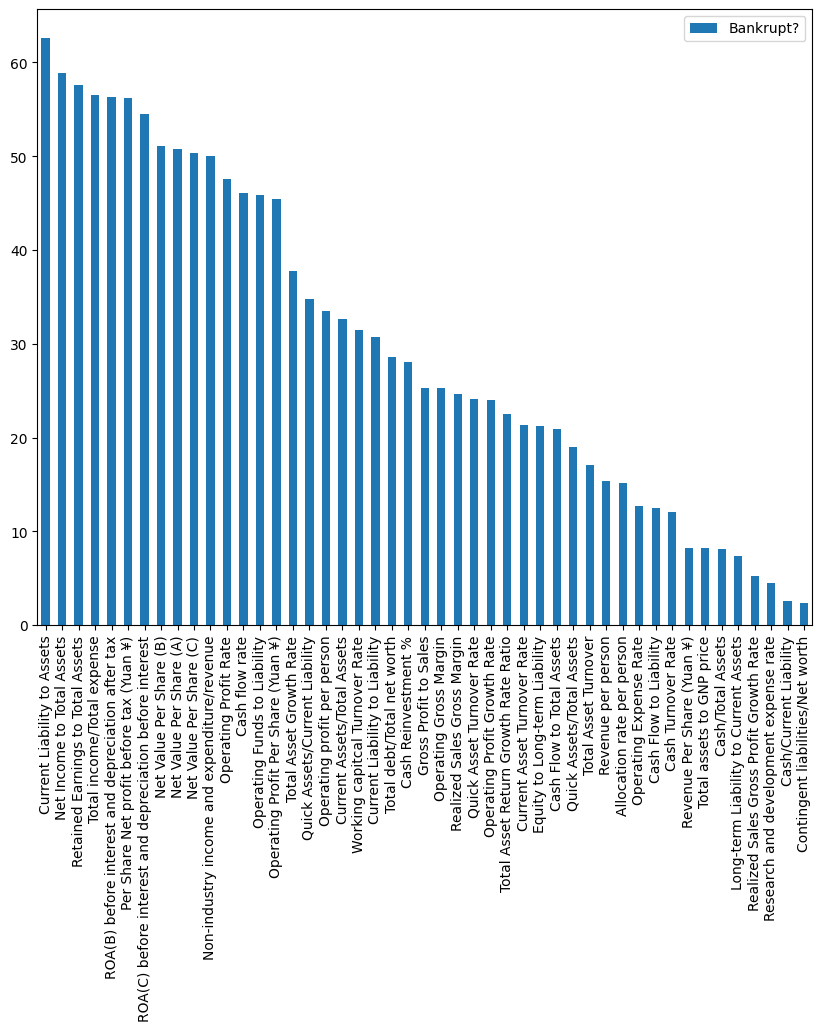

In [114]:
pd.DataFrame(abs(data_standardised.corr()['Bankrupt?'].drop('Bankrupt?')*100).sort_values(
ascending=False)).plot.bar(figsize = (10,8))

Usuwamy z zmiennych baranych pod uwagę zmienne których korelacja z minną objaśnianą jest poniżej 0,1

In [115]:
sort_orders= dict(sort_orders)
keys_to_drop=[]

for k in sort_orders.keys():
  if sort_orders.get(k) <= 0.1:
    keys_to_drop.append(k)
keys_to_drop  

['Revenue Per Share (Yuan ¥)',
 'Total assets to GNP price',
 'Cash/Total Assets',
 'Long-term Liability to Current Assets',
 'Realized Sales Gross Profit Growth Rate',
 'Research and development expense rate',
 'Cash/Current Liability',
 'Contingent liabilities/Net worth']

Sprawdzamy ile zmiennych powinnyśmy uwzględnić w PCA

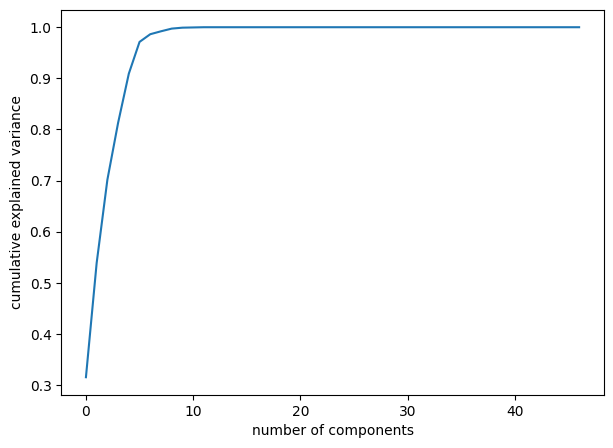

              0             1             2             3             4  \
0 -5.012286e+06 -2.540386e+09  1.340906e+09 -3.665516e+09  6.094849e+08   
1  3.997275e+08 -3.571381e+09  3.097916e+09 -2.388319e+09 -4.915615e+08   
2 -4.641148e+09  7.111957e+07 -1.623909e+09 -1.792689e+09 -2.345224e+09   
3  4.717788e+09 -3.133823e+09 -3.819591e+09 -7.647947e+08  6.272135e+08   
4  5.943845e+09  4.400721e+09 -1.190079e+09 -5.478359e+08 -1.026106e+08   

              5  
0 -5.776809e+08  
1 -8.230081e+08  
2 -8.584879e+08  
3 -1.153804e+09  
4  5.607357e+07  


In [116]:
exclude_filter = ~data_bankructwo.columns.isin(['Unnamed: 0', 'Bankrupt?'])

pca = PCA().fit(data_bankructwo.loc[:, exclude_filter])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.gcf().set_size_inches(7, 5)
plt.show()

pca = PCA(svd_solver='full', n_components=0.95)
principal_components = pca.fit_transform(data_bankructwo.loc[:, exclude_filter])
principal_df = pd.DataFrame(data=principal_components)

print(principal_df.head())



Na wykresie widać, że 6 pierwszych czynników może wyjaśnić ponad 95% całkowitej wariancji

PCA 2
=


In [117]:
# kolumny do wykluczenia (te na których nie chcemy PCA)
exclude_filter = ~data_standardised.columns.isin(['Bankrupt?','Revenue Per Share (Yuan ¥)',
 'Total assets to GNP price',
 'Cash/Total Assets',
 'Long-term Liability to Current Assets',
 'Realized Sales Gross Profit Growth Rate',
 'Research and development expense rate',
 'Cash/Current Liability',
 'Contingent liabilities/Net worth']) 
# liczba głównych składowych
pca = PCA(n_components = 6)
# przeliczenie
principal_components = pca.fit_transform(data_bankructwo.loc[:, exclude_filter])


Zmienne które uwzględniamy w modelu

In [118]:
principal_df = pd.DataFrame(data = principal_components)
principal_df['Bankrupt?'] = data_bankructwo['Bankrupt?']


Szukanie wektórów własnych

# Przygotowanie zbioru treningowego i testowego

Podzaił danych na testowe i uczące
https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

In [119]:
# Przygotowanie zbiorów treningowych i testowych dla danych po redukcji wymiarowości
X = principal_df.drop('Bankrupt?', axis=1)
y = principal_df['Bankrupt?']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=19)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [120]:
# Przygotowanie zbiorów treningowych i testowych dla danych bez redukcji wymiarowości
X_2 = data_standardised.loc[:, exclude_filter]
y_2 = data_standardised['Bankrupt?']
# Split the data into training and test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=13)

Liczebność klas nie jest zbalansowana. W związku z tym miara dokładnośći(accuracy) modelu nie będzie dobrym sposobem na ocenę modeli. Lepszą miarą oceny skuteczności modelu w przypadku niezbalansowanych liczebności klas jest miara F1 będąca średnią harmoniczną czułości (recall) i precyzji (precision).

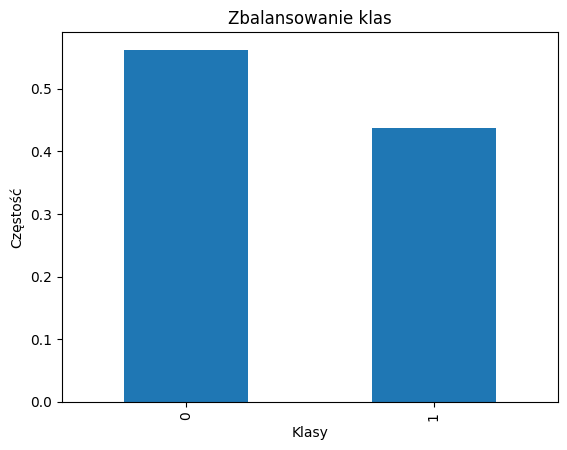

In [121]:
principal_df['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Klasy")
plt.ylabel("Częstość")
plt.title("Zbalansowanie klas");

# Modele wyuczone na danych po PCA

##Logistic Regression - regresja logistyczna. 
Jeden z podstawowych modeli służących do klasyfikacji binarnej.


In [122]:
clf_lg = LogisticRegression()

param_dist_lg = {
    'solver':['newton-cg', 'lbfgs', 'liblinear'],
    'penalty':['l2'],
    "tol":[0.0001,0.001,0.01,0.05,0.1,1,5,10],
    "C":[0.01,0.1,0.2,0.5,1],
    "class_weight":[None,'balanced']
}

grid_lg = GridSearchCV(estimator=clf_lg, param_grid=param_dist_lg, scoring='f1', n_jobs=-1, cv=5, verbose=4 )
grid_lg.fit(X_train, y_train)

best_params = grid_lg.best_params_
print("Najlepsze parametry : {}".format(best_params))
print("Najlepszy wynik : {}".format(grid_lg.best_score_))
print("Najlepszy model : {}".format(grid_lg.best_estimator_))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Najlepsze parametry : {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 10}
Najlepszy wynik : 0.5876855728968404
Najlepszy model : LogisticRegression(C=0.01, class_weight='balanced', tol=10)


In [123]:
clf_lg = LogisticRegression(solver=best_params.get('solver'), C=best_params.get('C'),class_weight=best_params.get('class_weight'),tol=best_params.get('tol')).fit(X_train,y_train) #uczenie modelu
y_pred_lg = clf_lg.predict(X_test) # predykcja zbioru testowego

#dokładność predykcji modelu
print("Miara dokładności: ",accuracy_score(y_test, y_pred_lg))
#średnia ważona f1-score dla wszystkich klas
print("Miara F1: ",f1_score(y_test, y_pred_lg))
print("Miara F1 dla poszczególnych klas: ",f1_score(y_test, y_pred_lg,average=None))

Miara dokładności:  0.65
Miara F1:  0.6788990825688074
Miara F1 dla poszczególnych klas:  [0.61538462 0.67889908]


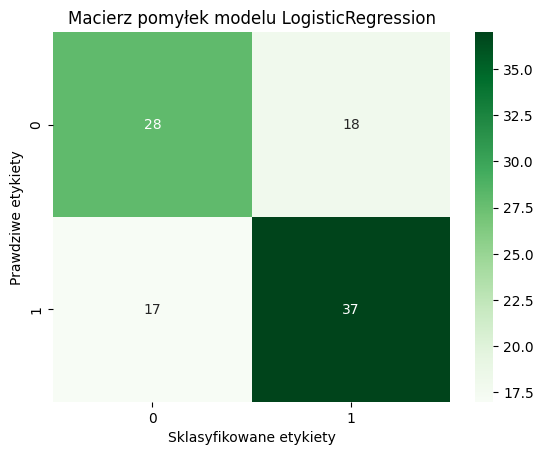

In [124]:
plt.figure()
matrix_lg = confusion_matrix(y_test, y_pred_lg)
ax= plt.subplot()
sns.heatmap(matrix_lg, annot=True, fmt='g', ax=ax,cmap='Greens')
ax.set_xlabel('Sklasyfikowane etykiety');ax.set_ylabel('Prawdziwe etykiety')
ax.set_title(f'Macierz pomyłek modelu {type(clf_lg).__name__}'); 
ax.xaxis.set_ticklabels(clf_lg.classes_); ax.yaxis.set_ticklabels(clf_lg.classes_);

##Support Vector Machines - Wektory nośne
Algorytm, którego działanie polega na odnalezieniu hiperpłaszczyzny najlepiej oddzielającej dwie klasy na n-wymiarowej płaszczyźnie.

In [125]:
svc=SVC()

param_dist_svc = {
    "gamma":[1, 0.1, 0.01, 0.001, 0.0001],
    "C":[0.1, 1, 10, 100],
    "kernel":['rbf','poly']
}

grid_svc = GridSearchCV(estimator=svc, param_grid=param_dist_svc, scoring='accuracy', n_jobs=-1, cv=5, verbose=4 )
grid_svc.fit(X_train, y_train)

best_params=grid_svc.best_params_
print("Najlepsze parametry : {}".format(grid_svc.best_params_))
print("Najlepszy wynik : {}".format(grid_svc.best_score_))
print("Najlepszy model : {}".format(grid_svc.best_estimator_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Najlepsze parametry : {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Najlepszy wynik : 0.7035759493670886
Najlepszy model : SVC(C=1, gamma=1)


In [126]:
svc=SVC(C=best_params.get('C'),gamma=best_params.get('gamma'),kernel=best_params.get('kernel'))
svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test) # predykcja zbioru testowego

#dokładność predykcji modelu
print("Miara dokładności: ",accuracy_score(y_test, y_pred_svc))
#średnia ważona f1-score dla wszystkich klas
print("Miara F1: ",f1_score(y_test, y_pred_svc))
print("Miara F1 dla poszczególnych klas: ",f1_score(y_test, y_pred_svc,average=None))

Miara dokładności:  0.6
Miara F1:  0.4117647058823529
Miara F1 dla poszczególnych klas:  [0.6969697  0.41176471]


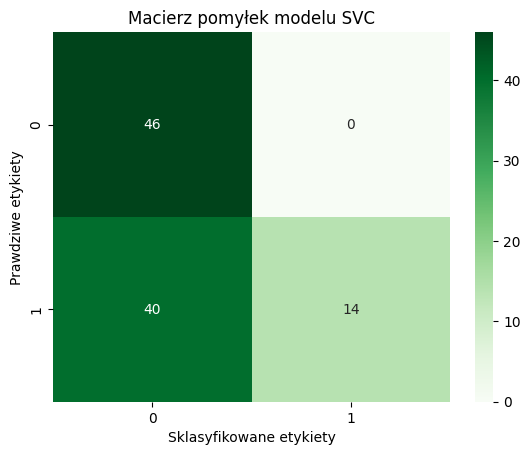

In [127]:
plt.figure()
matrix_svc = confusion_matrix(y_test, y_pred_svc)
ax= plt.subplot()
sns.heatmap(matrix_svc, annot=True, fmt='g', ax=ax,cmap='Greens')
ax.set_xlabel('Sklasyfikowane etykiety');ax.set_ylabel('Prawdziwe etykiety') 
ax.set_title(f'Macierz pomyłek modelu {type(svc).__name__}'); 
ax.xaxis.set_ticklabels(svc.classes_); ax.yaxis.set_ticklabels(svc.classes_);

##Extreme Gradient Boosting - XGBoost
Algorytm uczenia zespołowego, wykorzystującego wiele małych, wzmacnianych gradientem drzew decyzyjnych.

In [128]:
xgb = XGBClassifier(objective='binary:logistic', n_jobs=-1)
param_dist_xgb = { #scale_pos_weight
    "eta":[0,0.01,0.1,0.5],
    "gamma":[0,0.5,1,10],
    "max_depth":[5,7,10],
    "n_estimators":[150,200,300]
}

grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_dist_xgb, scoring='roc_auc', n_jobs=-1, cv=5, verbose=4 )
grid_xgb.fit(X_train, y_train)

best_params=grid_xgb.best_params_
print("Najlepsze parametry : {}".format(grid_xgb.best_params_))
print("Najlepszy wynik : {}".format(grid_xgb.best_score_))
print("Najlepszy model : {}".format(grid_xgb.best_estimator_))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Najlepsze parametry : {'eta': 0.1, 'gamma': 10, 'max_depth': 5, 'n_estimators': 150}
Najlepszy wynik : 0.7487459002607013
Najlepszy model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=10, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=-1,
              num_parallel_tree=None, predictor=None, ...)


In [129]:
xgb = XGBClassifier(max_depth=best_params.get('max_depth') ,n_estimators=best_params.get('n_estimators'),gamma=best_params.get('gamma'),eta=best_params.get('eta')).fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

#dokładność predykcji modelu
print("Miara dokładności: ",accuracy_score(y_test, y_pred_xgb))
# f1-score
print("Miara F1: ",f1_score(y_test, y_pred_xgb))
print("Miara F1 dla poszczególnych klas: ",f1_score(y_test, y_pred_xgb,average=None))

Miara dokładności:  0.66
Miara F1:  0.575
Miara F1 dla poszczególnych klas:  [0.71666667 0.575     ]


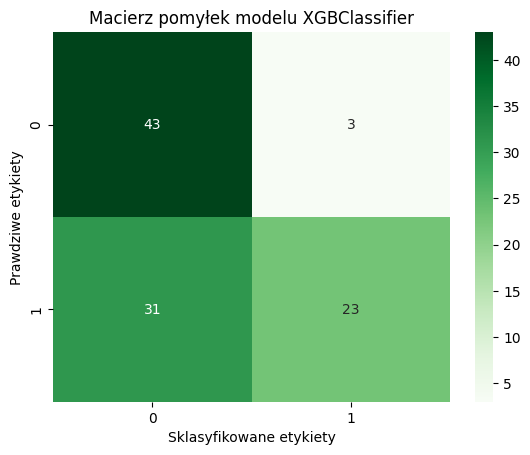

In [130]:
plt.figure()
matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
ax= plt.subplot()
sns.heatmap(matrix_xgb, annot=True, fmt='g', ax=ax,cmap='Greens')
ax.set_xlabel('Sklasyfikowane etykiety');ax.set_ylabel('Prawdziwe etykiety') 
ax.set_title(f'Macierz pomyłek modelu {type(xgb).__name__}'); 
ax.xaxis.set_ticklabels(xgb.classes_); ax.yaxis.set_ticklabels(xgb.classes_);

# Modele wyuczone na danych bez PCA

##Logistic Regression - regresja logistyczna

In [131]:
clf_lg_2 = LogisticRegression()

{
    'solver':['newton-cg', 'lbfgs', 'liblinear'],
    'penalty':['l2'],
    "tol":[0.0001,0.001,0.01,0.01,0.1,1,5,10],
    "C":[0.01,0.1,0.2,0.5,1],
    "class_weight":[None,'balanced']
}

best_params=grid_lg.best_params_
grid_lg = GridSearchCV(estimator=clf_lg_2, param_grid=param_dist_lg, scoring='f1', n_jobs=-1, cv=5, verbose=4 )
grid_lg.fit(X_train_2, y_train_2)

best_params=grid_lg.best_params_
print("Najlepsze parametry : {}".format(grid_lg.best_params_))
print("Najlepszy wynik : {}".format(grid_lg.best_score_))
print("Najlepszy model : {}".format(grid_lg.best_estimator_))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Najlepsze parametry : {'C': 0.2, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.05}
Najlepszy wynik : 0.8881532445597141
Najlepszy model : LogisticRegression(C=0.2, solver='liblinear', tol=0.05)


In [132]:
clf_lg_2 = LogisticRegression(solver=best_params.get('solver'),C=best_params.get('C'),class_weight=best_params.get('class_weight'),tol=best_params.get('tol')).fit(X_train_2,y_train_2) #uczenie modelu #uczenie modelu
y_pred_lg_2 = clf_lg_2.predict(X_test_2) # predykcja zbioru testowego

#dokładność predykcji modelu
print("Miara dokładności: ",accuracy_score(y_test_2, y_pred_lg_2))
#średnia ważona f1-score dla wszystkich klas
print("Miara F1: ",f1_score(y_test_2, y_pred_lg_2))
print("Miara F1 dla poszczególnych klas: ",f1_score(y_test_2, y_pred_lg_2,average=None))

Miara dokładności:  0.88
Miara F1:  0.8666666666666666
Miara F1 dla poszczególnych klas:  [0.89090909 0.86666667]


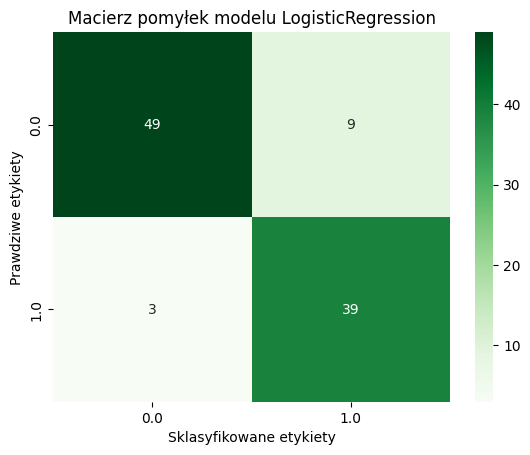

In [133]:
plt.figure()
matrix_lg_2 = confusion_matrix(y_test_2, y_pred_lg_2)
ax= plt.subplot()
sns.heatmap(matrix_lg_2, annot=True, fmt='g', ax=ax,cmap='Greens')
ax.set_xlabel('Sklasyfikowane etykiety');ax.set_ylabel('Prawdziwe etykiety')
ax.set_title(f'Macierz pomyłek modelu {type(clf_lg_2).__name__}'); 
ax.xaxis.set_ticklabels(clf_lg_2.classes_); ax.yaxis.set_ticklabels(clf_lg_2.classes_);

##Support Vector Machines - Wektory nośne

In [134]:
svc_2=SVC()

param_dist_svc = {
    "gamma":[1, 0.1, 0.01, 0.001, 0.0001],
    "C":[0.1, 1, 10, 100],
    "kernel":['rbf','poly']
}

grid_svc = GridSearchCV(estimator=svc_2, param_grid=param_dist_svc, scoring='f1', n_jobs=-1, cv=5, verbose=4 )
grid_svc.fit(X_train_2, y_train_2)


best_params= grid_svc.best_params_
print("Najlepsze parametry : {}".format(grid_svc.best_params_))
print("Najlepszy wynik : {}".format(grid_svc.best_score_))
print("Najlepszy model : {}".format(grid_svc.best_estimator_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Najlepsze parametry : {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Najlepszy wynik : 0.8918823493057184
Najlepszy model : SVC(C=10, gamma=0.001)


In [135]:
svc_2=SVC(C=best_params.get('C'),gamma=best_params.get('gamma'),kernel=best_params.get('kernel')).fit(X_train_2,y_train_2)

y_pred_svc_2 = svc_2.predict(X_test_2) # predykcja zbioru testowego

#dokładność predykcji modelu
print("Miara dokładności: ",accuracy_score(y_test_2, y_pred_svc_2))
#średnia ważona f1-score dla wszystkich klas
print("Miara F1: ",f1_score(y_test_2, y_pred_svc_2))
print("Miara F1 dla poszczególnych klas: ",f1_score(y_test_2, y_pred_svc_2,average=None))

Miara dokładności:  0.88
Miara F1:  0.8604651162790699
Miara F1 dla poszczególnych klas:  [0.89473684 0.86046512]


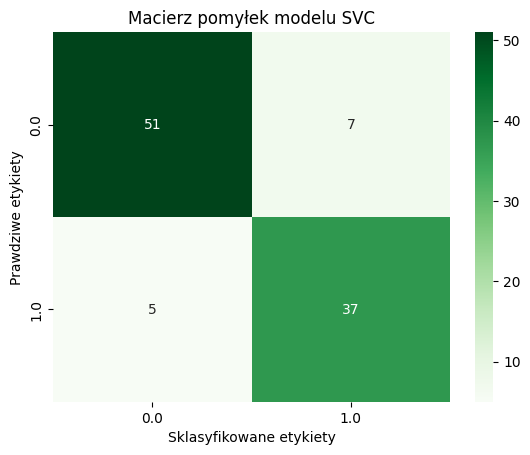

In [136]:
plt.figure()
matrix_svc_2 = confusion_matrix(y_test_2, y_pred_svc_2)
ax= plt.subplot()
sns.heatmap(matrix_svc_2, annot=True, fmt='g', ax=ax,cmap='Greens')
ax.set_xlabel('Sklasyfikowane etykiety');ax.set_ylabel('Prawdziwe etykiety') 
ax.set_title(f'Macierz pomyłek modelu {type(svc_2).__name__}'); 
ax.xaxis.set_ticklabels(svc_2.classes_); ax.yaxis.set_ticklabels(svc_2.classes_);

##Extreme Gradient Boosting - XGBoost

In [137]:
xgb_2 = XGBClassifier(objective='binary:logistic',n_jobs=-1)
param_dist_xgb = { #scale_pos_weight
    "eta":[0,0.1,0.5],
    "gamma":[0,0.5,1,10],
    "max_depth":[6,8,10],
    "n_estimators":[150,300]
}

grid_xgb = GridSearchCV(estimator=xgb_2, param_grid=param_dist_xgb, scoring='roc_auc', n_jobs=-1, cv=5, verbose=4 )
grid_xgb.fit(X_train_2, y_train_2)

best_params=grid_xgb.best_params_
print("Najlepsze parametry : {}".format(grid_xgb.best_params_))
print("Najlepszy wynik : {}".format(grid_xgb.best_score_))
print("Najlepszy model : {}".format(grid_xgb.best_estimator_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Najlepsze parametry : {'eta': 0.1, 'gamma': 0, 'max_depth': 6, 'n_estimators': 300}
Najlepszy wynik : 0.9627027417027417
Najlepszy model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, predictor=None, ...)


In [138]:
xgb_2 = XGBClassifier(max_depth=best_params.get('max_depth') ,n_estimators=best_params.get('n_estimators'),gamma=best_params.get('gamma'),eta=best_params.get('eta')).fit(X_train_2,y_train_2)

y_pred_xgb_2 = xgb_2.predict(X_test_2)


#dokładność predykcji modelu
print("Miara dokładności: ",accuracy_score(y_test_2, y_pred_xgb_2))
#średnia ważona f1-score dla wszystkich klas
print("Miara F1: ",f1_score(y_test_2, y_pred_xgb_2))
print("Miara F1 dla poszczególnych klas: ",f1_score(y_test_2, y_pred_xgb_2,average=None))

Miara dokładności:  0.89
Miara F1:  0.8705882352941177
Miara F1 dla poszczególnych klas:  [0.90434783 0.87058824]


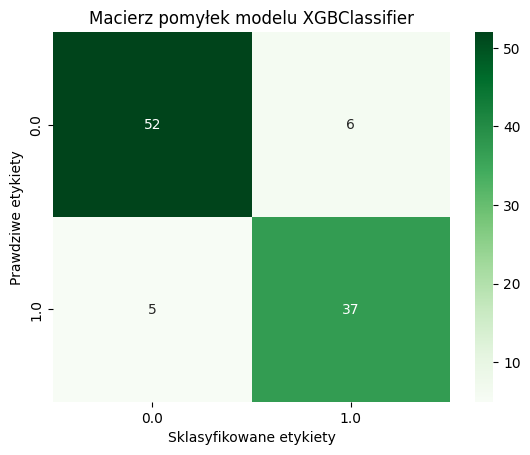

In [139]:
plt.figure()
matrix_xgb_2 = confusion_matrix(y_test_2, y_pred_xgb_2)
ax= plt.subplot()
sns.heatmap(matrix_xgb_2, annot=True, fmt='g', ax=ax,cmap='Greens')
ax.set_xlabel('Sklasyfikowane etykiety');ax.set_ylabel('Prawdziwe etykiety')
ax.set_title(f'Macierz pomyłek modelu {type(xgb_2).__name__}'); 
ax.xaxis.set_ticklabels(xgb_2.classes_); ax.yaxis.set_ticklabels(xgb_2.classes_);

#Porównanie modeli

In [140]:


modele = [clf_lg,svc,xgb,clf_lg_2,svc_2,xgb_2]
predykcje_pca = [y_pred_lg,y_pred_svc,y_pred_xgb]
predykcje_nonpca = [y_pred_lg_2,y_pred_svc_2,y_pred_xgb_2]

modele_nazwy = ['PCA '+type(clf_lg).__name__,'PCA '+type(svc).__name__,'PCA '+type(xgb).__name__,type(clf_lg_2).__name__,type(svc_2).__name__,type(xgb_2).__name__]
dokładność = list(map(lambda x: accuracy_score(y_test, x),predykcje_pca))+list(map(lambda x: accuracy_score(y_test_2, x),predykcje_nonpca))
f1 = list(map(lambda x: f1_score(y_test, x),predykcje_pca))+list(map(lambda x: f1_score(y_test_2, x),predykcje_nonpca))
tpr = list(map(lambda x: recall_score(y_test, x),predykcje_pca))+list(map(lambda x: recall_score(y_test_2, x),predykcje_nonpca))
tnr = list(map(lambda x: recall_score(y_test, x,pos_label=0),predykcje_pca))+list(map(lambda x: recall_score(y_test_2, x,pos_label=0),predykcje_nonpca))

dane_dict = {'Nazwa modelu':modele_nazwy,'Dokładność':dokładność,'F1-Score':f1,'Czułość klasy 1':tpr,'Czułość klasy 0':tnr}
tablica_modele = pd.DataFrame(dane_dict)
tablica_modele


,Nazwa modelu,Dokładność,F1-Score,Czułość klasy 1,Czułość klasy 0
0,PCA LogisticRegression,0.65,0.678899,0.685185,0.608696
1,PCA SVC,0.60,0.411765,0.259259,1.000000
2,PCA XGBClassifier,0.66,0.575000,0.425926,0.934783
3,LogisticRegression,0.88,0.866667,0.928571,0.844828
4,SVC,0.88,0.860465,0.880952,0.879310
5,XGBClassifier,0.89,0.870588,0.880952,0.896552


In [141]:
recall_score(y_test,y_pred_lg)
matrix_lg

array([[28, 18],
       [17, 37]])

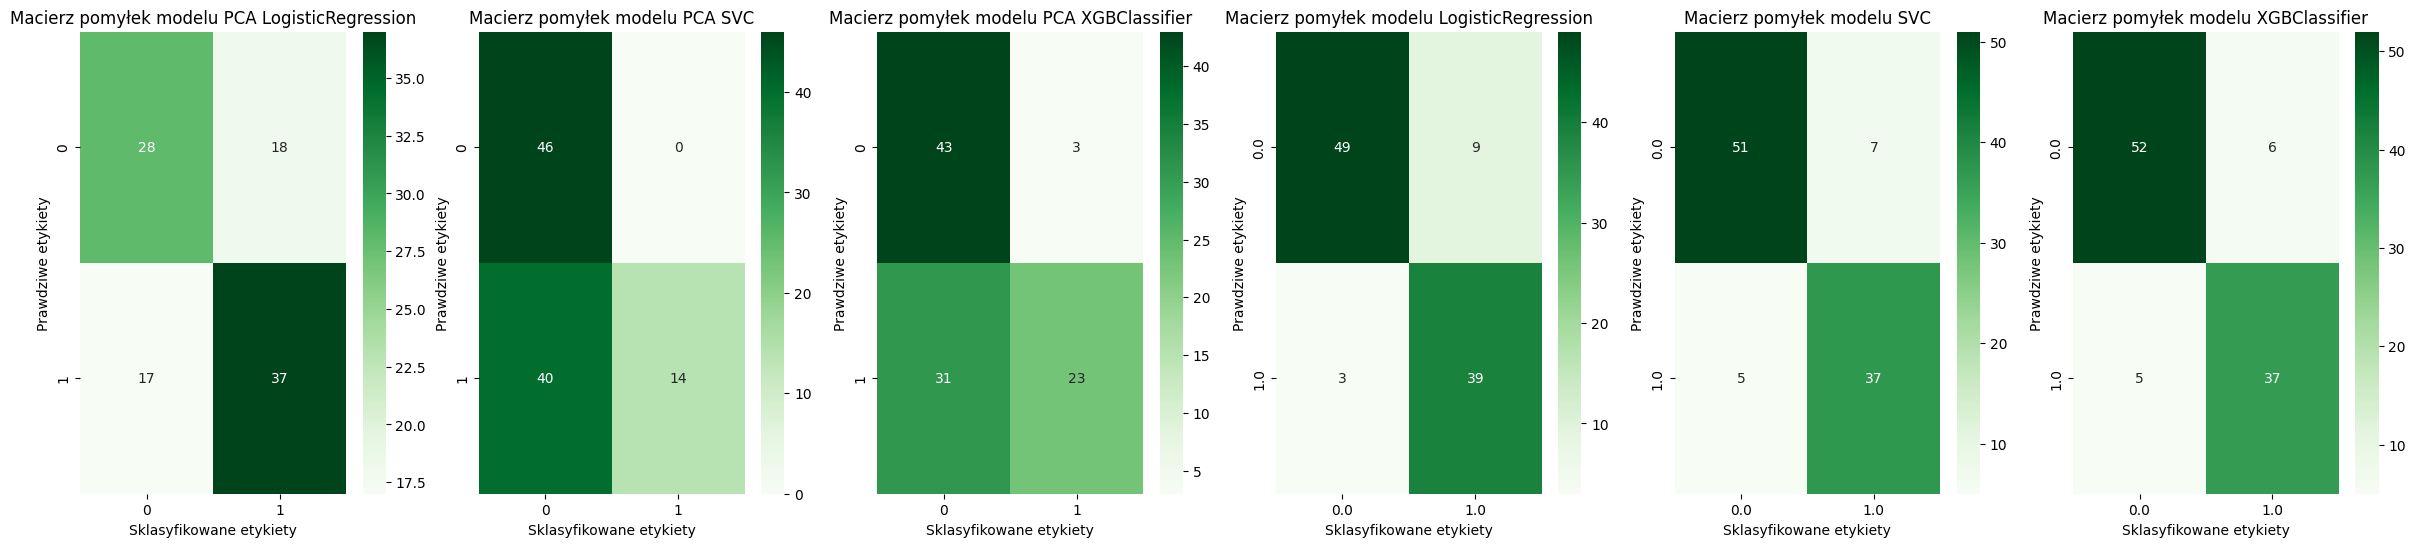

In [142]:
matrix_list = [matrix_lg,matrix_svc,matrix_xgb,matrix_lg_2,matrix_svc_2,matrix_xgb_2]
fig, axn = plt.subplots(1,6,figsize=(30,6))

for i, ax in enumerate(axn.flat):
    sns.heatmap(matrix_list[i], annot=True, fmt='g', ax=ax,cmap='Greens')
    ax.set_xlabel('Sklasyfikowane etykiety');ax.set_ylabel('Prawdziwe etykiety')
    ax.set_title(f'Macierz pomyłek modelu {modele_nazwy[i]}'); 
    ax.xaxis.set_ticklabels(modele[i].classes_); ax.yaxis.set_ticklabels(modele[i].classes_);


##Ważność atrybutów
Ważność atrybutów została wyliczona dla modelu regresji logistycznej oraz XGBoost dla danych bez PCA. Transforamcja danych przez metodę kernel 'rbf' wykorzystywaną w algorytmie wektorów nośnych uniemożliwia znalezienie najważniejszych zmiennych wpływających na skuteczność modelu.

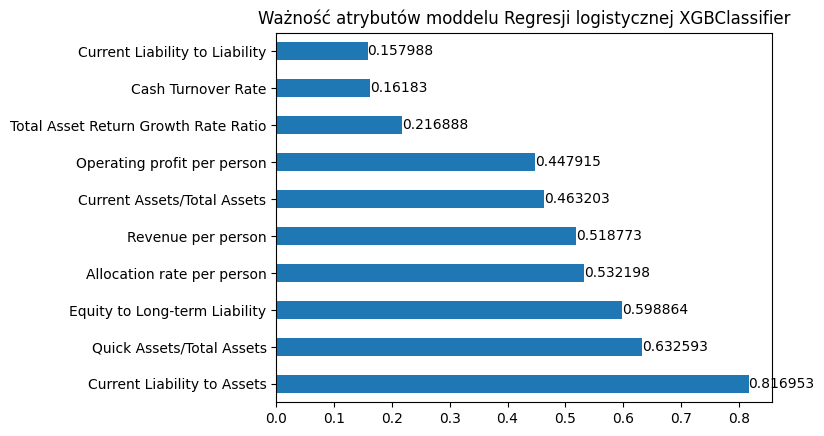

In [143]:
ax = pd.Series(clf_lg_2.coef_[0], index=X_test_2.columns).nlargest(10).plot(kind='barh')
ax.bar_label(ax.containers[0])
ax.set_title(f'Ważność atrybutów moddelu Regresji logistycznej {modele_nazwy[i]}'); 

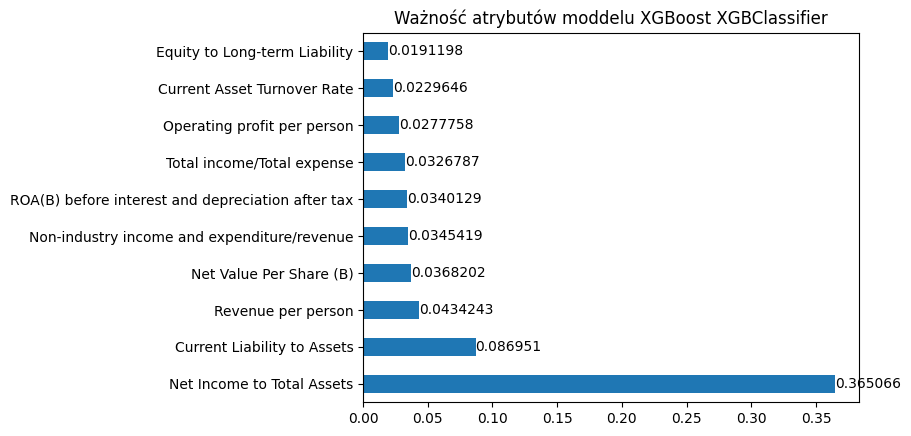

In [144]:
ax = pd.Series(xgb_2.feature_importances_, index=X_test_2.columns).nlargest(10).plot(kind='barh')
ax.bar_label(ax.containers[0])
ax.set_title(f'Ważność atrybutów moddelu XGBoost {modele_nazwy[i]}'); 

##Wnioski
Skuteczniejszymi modelami okazały się modele nauczone z wykorzystaniem danych nieprzetworzonych przez analizę głównych składowych. Wynika to z tego, że każda redukcja wymiaru powoduje zmniejszenie się wartości wariancji.

Najskuteczniejszy model jeśli chodzi o miarę f1 oraz dokładność to model XGBoost ( f1 = 0.87), lecz jeśli model miałby skupiać się na jak najdodkładnieszym przewidywaniu upadłości (klasa 1) to najdokładniejszym w jej przewidywaniu był model regresji logistycznej, którego skuteczność w klasyfikacji próbek klasy 1 wyniosła  ok. 92,86%.